# ライブラリインポート

In [1]:
import pandas as pd
import numpy as np

# Issue・Agentリストの定義

In [2]:
ISSUE_NAMES = [
    'Laptop',
    'ItexvsCypress',
    'IS_BT_Acquisition',
    'Grocery',
    'thompson',
    'Car',
    'EnergySmall_A'
]
AGENT_LIST = [
    'Boulware',
    'Linear',
    'Conceder',
    'TitForTat1',
    'TitForTat2',
    "AgentK",
    "HardHeaded",
    "Atlas3",
    "AgentGG",
]

# AIAg_generalのデータ集計（Util, Agreement rate, Social welfare, Step, Step efficiency）

## Util

In [3]:
path = './results/All_general/csv'

results_all = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = result['my_util'].mean()
        results_all[agent][issue] = util
results_all = results_all.T
results_all['Average'] = results_all.mean(axis=1)
column_average = results_all.mean(axis=0)
column_average.name = 'Average'
results_all = results_all.append(column_average)
results_all.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/15976895.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all = results_all.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.726,0.147,0.797,0.494,0.303,0.602,0.340,0.487
Linear,0.706,0.281,0.812,0.588,0.497,0.908,0.556,0.621
Conceder,0.795,0.436,0.829,0.571,0.611,0.907,0.697,0.692
TitForTat1,0.752,0.373,0.816,0.576,0.601,0.904,0.678,0.671
TitForTat2,0.713,0.350,0.811,0.569,0.598,0.845,0.682,0.653
AgentK,0.702,0.151,0.791,0.404,0.170,0.365,0.121,0.386
HardHeaded,0.670,0.176,0.804,0.472,0.110,0.628,0.084,0.420
Atlas3,0.721,0.206,0.816,0.595,0.436,0.857,0.535,0.595
AgentGG,0.726,0.207,0.796,0.580,0.168,0.675,0.176,0.475
Average,0.723,0.258,0.808,0.539,0.388,0.744,0.430,0.556


## Agreement rate

In [4]:
results_all_agreement = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = (result['agreement'].isna().sum())
        results_all_agreement[agent][issue] = (100 - util) / 100
results_all_agreement = results_all_agreement.T
results_all_agreement['Average'] = results_all_agreement.mean(axis=1)
column_average = results_all_agreement.mean(axis=0)
column_average.name = 'Average'
results_all_agreement = results_all_agreement.append(column_average)
results_all_agreement
results_all_agreement.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3397732338.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_agreement = results_all_agreement.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
Linear,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
Conceder,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
TitForTat1,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
TitForTat2,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
AgentK,1.0,1.0,0.990,0.740,0.800,0.590,0.680,0.829
HardHeaded,1.0,1.0,1.000,0.900,0.660,0.800,0.600,0.851
Atlas3,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000
AgentGG,1.0,1.0,1.000,0.980,0.670,0.860,0.560,0.867
Average,1.0,1.0,0.999,0.958,0.903,0.917,0.871,0.950


## Social welfare

In [5]:
results_all_social = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['social'].mean(),3)
        results_all_social[agent][issue] = util
results_all_social['Average'] = results_all_social.mean(axis=1)
column_average = results_all_social.mean(axis=0)
column_average.name = 'Average'
results_all_social = results_all_social.append(column_average)
results_all_social = results_all_social.T
results_all_social.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3430260609.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_social = results_all_social.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.726,1.147,1.795,1.440,1.142,1.530,1.069,1.407
Linear,1.701,1.178,1.794,1.471,1.209,1.830,1.126,1.473
Conceder,1.671,1.095,1.736,1.279,1.202,1.611,1.157,1.393
TitForTat1,1.715,1.141,1.757,1.279,1.169,1.675,1.155,1.413
TitForTat2,1.699,1.137,1.760,1.281,1.175,1.599,1.156,1.401
AgentK,1.697,1.148,1.765,1.123,0.916,0.935,0.727,1.187
HardHeaded,1.649,1.155,1.792,1.333,0.741,1.396,0.662,1.247
Atlas3,1.720,1.170,1.795,1.498,1.118,1.791,1.057,1.450
AgentGG,1.726,1.174,1.788,1.497,0.767,1.492,0.656,1.300
Average,1.700,1.149,1.776,1.356,1.049,1.540,0.974,1.363


## Step

In [6]:
results_all_step = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = result['step'].mean()
        results_all_step[agent][issue] = util
results_all_step['Average'] = results_all_step.mean(axis=1)
column_average = results_all_step.mean(axis=0)
column_average.name = 'Average'
results_all_step = results_all_step.append(column_average)
results_all_step = results_all_step.T
results_all_step.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/4133010583.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_step = results_all_step.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,2.31,17.460,20.310,40.180,47.140,52.720,53.470,33.370
Linear,2.44,10.540,8.670,15.200,26.700,9.770,36.650,15.710
Conceder,1.36,2.220,1.650,2.700,2.820,2.270,5.090,2.587
TitForTat1,2.25,3.500,4.160,4.240,4.870,4.080,6.620,4.246
TitForTat2,2.29,4.380,4.930,4.920,5.600,4.920,7.480,4.931
AgentK,4.23,12.630,25.760,44.880,47.450,55.390,53.220,34.794
HardHeaded,2.81,12.070,9.180,36.290,48.860,50.490,51.880,30.226
Atlas3,2.58,13.500,6.920,19.360,31.300,13.860,33.050,17.224
AgentGG,2.68,12.250,11.600,28.280,48.560,36.670,57.490,28.219
Average,2.55,9.839,10.353,21.783,29.256,25.574,33.883,19.034


## Step efficiency

In [7]:
results_all_step_eff = (results_all.iloc[:-1,:-1] / results_all_step.iloc[:-1,:-1])
results_all_step_eff['Average'] = results_all_step_eff.mean(axis=1)
column_average = results_all_step_eff.mean(axis=0)
column_average.name = 'Average'
results_all_step_eff = results_all_step_eff.append(column_average)
results_all_step_eff = results_all_step_eff.apply(pd.to_numeric).round(3)
results_all_step_eff.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/135143156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_step_eff = results_all_step_eff.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.314,0.008,0.039,0.012,0.006,0.011,0.006,0.057
Linear,0.289,0.027,0.094,0.039,0.019,0.093,0.015,0.082
Conceder,0.584,0.196,0.502,0.212,0.217,0.400,0.137,0.321
TitForTat1,0.334,0.106,0.196,0.136,0.123,0.222,0.102,0.174
TitForTat2,0.311,0.080,0.164,0.116,0.107,0.172,0.091,0.149
AgentK,0.166,0.012,0.031,0.009,0.004,0.007,0.002,0.033
HardHeaded,0.238,0.015,0.088,0.013,0.002,0.012,0.002,0.053
Atlas3,0.279,0.015,0.118,0.031,0.014,0.062,0.016,0.076
AgentGG,0.271,0.017,0.069,0.021,0.003,0.018,0.003,0.057
Average,0.310,0.053,0.145,0.065,0.055,0.111,0.042,0.111


# AIAg_expertのデータ集計（Util, Agreement rate, Social welfare, Step, Step efficiency）

## Util

In [8]:
path = './results/All_expert'
results_expert = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/csv/{agent}/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = result['my_util'].mean()
        util_std = result['my_util'].std()
        results_expert[agent][issue] = util
results_expert = results_expert.T
results_expert['Average'] = results_expert.mean(axis=1)
column_average = results_expert.mean(axis=0)
column_average.name = 'Average'
results_expert = results_expert.append(column_average)
results_expert = results_expert.apply(pd.to_numeric).round(3)
results_expert

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3006124943.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_expert = results_expert.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.961,0.765,0.882,0.997,0.822,0.982,0.884,0.899
Linear,0.912,0.786,0.895,0.840,0.803,0.932,0.884,0.865
Conceder,1.000,0.786,0.934,1.000,0.898,0.993,0.853,0.923
TitForTat1,0.966,0.854,0.924,1.000,0.864,0.979,0.931,0.931
TitForTat2,1.000,0.824,0.936,0.999,0.842,0.979,0.826,0.915
AgentK,0.710,0.167,0.803,0.554,0.128,0.740,0.051,0.450
HardHeaded,0.726,0.182,0.827,0.630,0.290,0.689,0.055,0.486
Atlas3,0.803,0.606,0.869,0.840,0.770,0.906,0.640,0.776
AgentGG,0.726,0.286,0.802,0.634,0.360,0.854,0.222,0.555
Average,0.867,0.584,0.875,0.833,0.642,0.895,0.594,0.756


## Agreement rate

In [9]:
results_expert_agreement = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/csv/{agent}/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = (result['agreement'].isna().sum())
        results_expert_agreement[agent][issue] = (100 - util) / 100
results_expert_agreement = results_expert_agreement.T
results_expert_agreement['Average'] = results_expert_agreement.mean(axis=1)
column_average = results_expert_agreement.mean(axis=0)
column_average.name = 'Average'
results_expert_agreement = results_expert_agreement.append(column_average)
results_expert_agreement.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/263505692.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_expert_agreement = results_expert_agreement.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.0,1.0,0.990,1.0,1.0,1.000,1.0,0.999
Linear,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
Conceder,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
TitForTat1,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
TitForTat2,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
AgentK,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
HardHeaded,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
Atlas3,1.0,1.0,1.000,1.0,1.0,1.000,1.0,1.000
AgentGG,1.0,1.0,1.000,1.0,1.0,0.990,1.0,0.999
Average,1.0,1.0,0.999,1.0,1.0,0.999,1.0,1.000


## Social welfare

In [10]:
results_expert_social = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/csv/{agent}/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = (result['social'].mean())
        results_expert_social[agent][issue] = util
results_expert_social['Average'] = results_expert_social.mean(axis=1)
column_average = results_expert_social.mean(axis=0)
column_average.name = 'Average'
results_expert_social = results_expert_social.append(column_average)
results_expert_social = results_expert_social.T
results_expert_social.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3768416219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_expert_social = results_expert_social.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.708,1.264,1.791,1.542,1.409,1.788,1.066,1.509
Linear,1.728,1.323,1.823,1.735,1.435,1.863,1.066,1.567
Conceder,1.691,1.323,1.781,1.525,1.360,1.590,1.311,1.512
TitForTat1,1.684,1.201,1.817,1.525,1.376,1.799,1.073,1.496
TitForTat2,1.691,1.124,1.837,1.529,1.369,1.730,1.169,1.493
AgentK,1.705,1.153,1.789,1.538,1.112,1.712,1.029,1.434
HardHeaded,1.726,1.157,1.811,1.605,1.245,1.673,1.038,1.465
Atlas3,1.742,1.432,1.834,1.735,1.540,1.863,1.065,1.602
AgentGG,1.726,1.228,1.796,1.606,1.300,1.803,1.174,1.519
Average,1.711,1.245,1.809,1.593,1.350,1.758,1.110,1.511


## Step

In [11]:
results_expert_step = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/csv/{agent}/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['step'].mean(),3)
        results_expert_step[agent][issue] = util
results_expert_step['Average'] = results_expert_step.mean(axis=1)
column_average = results_expert_step.mean(axis=0)
column_average.name = 'Average'
results_expert_step = results_expert_step.append(column_average)
results_expert_step = results_expert_step.T
results_expert_step.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/1369404079.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_expert_step = results_expert_step.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,65.060,76.270,71.850,75.260,74.440,68.000,79.000,72.840
Linear,28.520,39.830,23.370,9.130,32.230,5.960,66.000,29.291
Conceder,2.000,3.270,3.220,3.000,3.000,2.100,3.000,2.799
TitForTat1,3.410,5.280,5.070,4.730,4.750,3.220,4.490,4.421
TitForTat2,5.530,8.010,5.400,6.210,5.460,5.360,5.630,5.943
AgentK,2.000,7.370,3.210,8.510,8.470,11.940,2.970,6.353
HardHeaded,1.000,1.000,3.000,1.000,7.960,13.960,12.530,5.779
Atlas3,12.160,27.040,4.880,16.290,35.010,6.020,54.050,22.207
AgentGG,1.000,11.610,4.580,6.810,10.310,16.290,9.010,8.516
Average,13.409,19.964,13.842,14.549,20.181,14.761,26.298,17.572


## Step efficiency

In [12]:
results_expert_step_eff = (results_expert.iloc[:-1,:-1] / results_expert_step.iloc[:-1,:-1])
results_expert_step_eff = results_expert_step_eff.apply(pd.to_numeric).round(3)
results_expert_step_eff['Average'] = results_expert_step_eff.mean(axis=1)
column_average = results_expert_step_eff.mean(axis=0)
column_average.name = 'Average'
results_expert_step_eff = results_expert_step_eff.append(column_average)
results_expert_step_eff = results_expert_step_eff.apply(pd.to_numeric).round(3)
results_expert_step_eff.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3069803535.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_expert_step_eff = results_expert_step_eff.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.015,0.010,0.012,0.013,0.011,0.014,0.011,0.012
Linear,0.032,0.020,0.038,0.092,0.025,0.156,0.013,0.054
Conceder,0.500,0.240,0.290,0.333,0.299,0.473,0.284,0.346
TitForTat1,0.283,0.162,0.182,0.211,0.182,0.304,0.207,0.219
TitForTat2,0.181,0.103,0.173,0.161,0.154,0.183,0.147,0.157
AgentK,0.355,0.023,0.250,0.065,0.015,0.062,0.017,0.112
HardHeaded,0.726,0.182,0.276,0.630,0.036,0.049,0.004,0.272
Atlas3,0.066,0.022,0.178,0.052,0.022,0.150,0.012,0.072
AgentGG,0.726,0.025,0.175,0.093,0.035,0.052,0.025,0.162
Average,0.320,0.087,0.175,0.183,0.087,0.160,0.080,0.156


# MiPN_generalのデータ集計（Util, Agreement rate, Social welfare, Step, Step efficiency）

## Util

In [13]:
path = './results/All_mipn_general/csv'

results_mipn_all = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['my_util'].mean(),3)
        util_std = np.round(result['my_util'].std(),3)
        results_mipn_all[agent][issue] = util
results_mipn_all = results_mipn_all.T
results_mipn_all['Average'] = results_mipn_all.mean(axis=1)
column_average = results_mipn_all.mean(axis=0)
column_average.name = 'Average'
results_mipn_all = results_mipn_all.append(column_average)
results_mipn_all.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/2872312248.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_all = results_mipn_all.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.759,0.671,0.797,0.943,0.239,0.543,0.324,0.611
Linear,0.818,0.451,0.800,0.908,0.550,0.909,0.544,0.711
Conceder,0.739,0.605,0.832,0.286,0.542,0.836,0.534,0.625
TitForTat1,0.768,0.324,0.797,0.344,0.374,0.777,0.459,0.549
TitForTat2,0.795,0.367,0.802,0.364,0.389,0.722,0.463,0.557
AgentK,0.480,0.000,0.778,0.000,0.008,0.018,0.002,0.184
HardHeaded,0.758,0.061,0.798,0.000,0.000,0.003,0.000,0.231
Atlas3,0.778,0.284,0.799,0.754,0.631,0.904,0.684,0.691
AgentGG,0.376,0.119,0.781,0.000,0.039,0.022,0.001,0.191
Average,0.697,0.320,0.798,0.400,0.308,0.526,0.335,0.483


## Agreement rate

In [14]:
results_mipn_all_agreement = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = (result['agreement'].isna().sum())
        results_mipn_all_agreement[agent][issue] = (100 - util) / 100
results_mipn_all_agreement = results_mipn_all_agreement.T
results_mipn_all_agreement['Average'] = results_mipn_all_agreement.mean(axis=1)
column_average = results_mipn_all_agreement.mean(axis=0)
column_average.name = 'Average'
results_mipn_all_agreement = results_mipn_all_agreement.append(column_average)
results_mipn_all_agreement.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3610651913.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_all_agreement = results_mipn_all_agreement.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.000,1.000,1.000,1.000,0.45,0.580,0.490,0.789
Linear,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000
Conceder,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000
TitForTat1,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000
TitForTat2,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000
AgentK,0.580,0.000,0.970,0.000,0.02,0.020,0.010,0.229
HardHeaded,1.000,0.340,1.000,0.000,0.01,0.010,0.000,0.337
Atlas3,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000
AgentGG,0.560,0.480,0.980,0.000,0.19,0.040,0.010,0.323
Average,0.904,0.758,0.994,0.667,0.63,0.628,0.612,0.742


## Social welfare

In [15]:
results_mipn_all_social = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['social'].mean(),3)
        results_mipn_all_social[agent][issue] = util
results_mipn_all_social['Average'] = results_mipn_all_social.mean(axis=1)
column_average = results_mipn_all_social.mean(axis=0)
column_average.name = 'Average'
results_mipn_all_social = results_mipn_all_social.append(column_average)
results_mipn_all_social = results_mipn_all_social.T
results_mipn_all_social.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3977752421.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_all_social = results_mipn_all_social.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.693,1.352,1.797,1.662,0.396,0.829,0.499,1.175
Linear,1.738,1.230,1.795,1.684,0.972,1.792,1.002,1.459
Conceder,1.596,1.250,1.726,0.949,1.031,1.689,0.986,1.318
TitForTat1,1.652,1.053,1.784,1.057,1.097,1.659,1.013,1.331
TitForTat2,1.681,1.112,1.789,1.073,1.011,1.632,0.991,1.327
AgentK,1.013,0.000,1.741,0.000,0.025,0.036,0.010,0.404
HardHeaded,1.715,0.390,1.797,0.000,0.010,0.013,0.000,0.561
Atlas3,1.705,1.108,1.797,1.509,0.987,1.759,1.003,1.410
AgentGG,0.929,0.570,1.761,0.000,0.215,0.062,0.010,0.507
Average,1.525,0.896,1.776,0.882,0.638,1.052,0.613,1.055


## Step

In [16]:
results_mipn_all_step = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{agent}'+f'/{issue}/det=False_noise=False'+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['step'].mean(),3)
        results_mipn_all_step[agent][issue] = util
results_mipn_all_step['Average'] = results_mipn_all_step.mean(axis=1)
column_average = results_mipn_all_step.mean(axis=0)
column_average.name = 'Average'
results_mipn_all_step = results_mipn_all_step.append(column_average)
results_mipn_all_step = results_mipn_all_step.T
results_mipn_all_step

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/1521312729.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_all_step = results_mipn_all_step.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,52.98,75.9,3.85,76.44,79.42,78.78,79.35,63.817143
Linear,12.55,21.07,12.09,21.45,52.38,10.81,48.29,25.52
Conceder,1.0,2.0,1.0,1.02,8.76,1.0,7.86,3.234286
TitForTat1,4.11,3.43,3.45,4.76,3.43,3.95,5.6,4.104286
TitForTat2,4.99,4.58,4.0,6.82,7.27,4.59,7.62,5.695714
AgentK,72.02,80.0,32.45,80.0,79.79,79.91,79.87,72.005714
HardHeaded,42.66,62.01,3.33,80.0,79.4,79.27,80.0,60.952857
Atlas3,14.21,27.22,6.46,41.23,41.08,27.74,42.09,28.575714
AgentGG,49.66,53.94,7.99,80.0,70.36,77.22,79.24,59.772857
Average,28.242222,36.683333,8.291111,43.524444,46.876667,40.363333,47.768889,35.964286


## Step efficiency

In [17]:
results_mipn_all_step_eff = (results_mipn_all.iloc[:-1,:-1] / results_mipn_all_step.iloc[:-1,:-1])
results_mipn_all_step_eff = results_mipn_all_step_eff.apply(pd.to_numeric).round(3)
results_mipn_all_step_eff['Average'] = results_mipn_all_step_eff.mean(axis=1)
column_average = results_mipn_all_step_eff.mean(axis=0)
column_average.name = 'Average'
results_mipn_all_step_eff = results_mipn_all_step_eff.append(column_average)
results_mipn_all_step_eff = results_mipn_all_step_eff.apply(pd.to_numeric).round(3)
results_mipn_all_step_eff.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3650182759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_all_step_eff = results_mipn_all_step_eff.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.014,0.009,0.207,0.012,0.003,0.007,0.004,0.037
Linear,0.065,0.021,0.066,0.042,0.011,0.084,0.011,0.043
Conceder,0.739,0.302,0.832,0.280,0.062,0.836,0.068,0.446
TitForTat1,0.187,0.094,0.231,0.072,0.109,0.197,0.082,0.139
TitForTat2,0.159,0.080,0.200,0.053,0.054,0.157,0.061,0.109
AgentK,0.007,0.000,0.024,0.000,0.000,0.000,0.000,0.004
HardHeaded,0.018,0.001,0.240,0.000,0.000,0.000,0.000,0.037
Atlas3,0.055,0.010,0.124,0.018,0.015,0.033,0.016,0.039
AgentGG,0.008,0.002,0.098,0.000,0.001,0.000,0.000,0.016
Average,0.139,0.058,0.225,0.053,0.028,0.146,0.027,0.097


# MiPN_expertのデータ集計（Util, Agreement rate, Social welfare, Step, Step efficiency）

## Util

In [18]:
path = './results/mipn_results/mipn/all/det=False_noise=False'

results_mipn_expert = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        my_util = np.round(result['my_util'].mean(),3)
        results_mipn_expert[agent][issue] = my_util
results_mipn_expert['Average'] = results_mipn_expert.mean(axis=1)
column_average = results_mipn_expert.mean(axis=0)
column_average.name = 'Average'
results_mipn_expert = results_mipn_expert.append(column_average).T
results_mipn_expert.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3623465979.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_expert = results_mipn_expert.append(column_average).T


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.726,0.925,0.798,0.992,0.962,0.904,0.876,0.883
Linear,0.999,0.821,0.850,0.935,0.826,0.965,0.710,0.872
Conceder,1.000,0.663,0.940,1.000,0.905,0.994,0.929,0.919
TitForTat1,0.082,0.880,0.909,0.985,0.879,0.971,0.805,0.787
TitForTat2,1.000,0.636,0.834,0.984,0.689,0.601,0.775,0.788
AgentK,0.726,0.176,0.868,0.630,0.131,0.878,0.081,0.499
HardHeaded,0.726,0.211,0.798,0.630,0.290,0.837,0.037,0.504
Atlas3,0.726,0.995,0.879,0.655,0.897,0.926,0.943,0.860
AgentGG,0.726,0.290,0.782,0.761,0.664,0.869,0.573,0.666
Average,0.746,0.622,0.851,0.841,0.694,0.883,0.637,0.753


## Agreement rate

In [19]:
results_mipn_expert_agreement = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = (result['agreement'].isna().sum())
        results_mipn_expert_agreement[agent][issue] = (100 - util) / 100
results_mipn_expert_agreement = results_mipn_expert_agreement.T
results_mipn_expert_agreement['Average'] = results_mipn_expert_agreement.mean(axis=1)
column_average = results_mipn_expert_agreement.mean(axis=0)
column_average.name = 'Average'
results_mipn_expert_agreement = results_mipn_expert_agreement.append(column_average)
results_mipn_expert_agreement.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3946829556.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_expert_agreement = results_mipn_expert_agreement.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.000,1.000,1.000,1.000,0.990,1.0,0.980,0.996
Linear,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000
Conceder,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000
TitForTat1,0.140,1.000,1.000,1.000,1.000,1.0,1.000,0.877
TitForTat2,1.000,1.000,1.000,1.000,0.790,1.0,1.000,0.970
AgentK,1.000,0.890,1.000,1.000,0.740,1.0,0.470,0.871
HardHeaded,1.000,1.000,1.000,1.000,1.000,1.0,0.940,0.991
Atlas3,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000
AgentGG,1.000,0.950,0.980,0.950,1.000,1.0,1.000,0.983
Average,0.904,0.982,0.998,0.994,0.947,1.0,0.932,0.965


## Social welfare

In [20]:
results_mipn_expert_social = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['social'].mean(),3)
        results_mipn_expert_social[agent][issue] = util
results_mipn_expert_social['Average'] = results_mipn_expert_social.mean(axis=1)
column_average = results_mipn_expert_social.mean(axis=0)
column_average.name = 'Average'
results_mipn_expert_social = results_mipn_expert_social.append(column_average)
results_mipn_expert_social = results_mipn_expert_social.T
results_mipn_expert_social.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3604220255.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_expert_social = results_mipn_expert_social.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.726,1.208,1.798,1.519,1.130,1.766,1.170,1.474
Linear,1.814,1.212,1.823,1.717,1.404,1.806,1.237,1.573
Conceder,1.815,1.263,1.837,1.525,1.301,1.620,1.275,1.519
TitForTat1,0.177,1.209,1.798,1.517,1.125,1.176,0.922,1.132
TitForTat2,1.815,1.049,1.811,1.527,0.797,1.447,0.955,1.343
AgentK,1.726,1.047,1.830,1.605,0.810,1.849,0.495,1.337
HardHeaded,1.726,1.182,1.798,1.605,1.245,1.813,0.961,1.476
Atlas3,1.726,1.210,1.837,1.581,1.117,1.837,1.137,1.492
AgentGG,1.726,1.171,1.762,1.617,1.478,1.827,1.357,1.563
Average,1.583,1.172,1.810,1.579,1.156,1.682,1.057,1.434


## Step

In [21]:
results_mipn_expert_step = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent in AGENT_LIST:
    for issue in ISSUE_NAMES:
        result = pd.read_csv(path+f'/{issue}-{agent}-dF-nF.tsv', delimiter='\t')
        util = np.round(result['step'].mean(),3)
        results_mipn_expert_step[agent][issue] = util
results_mipn_expert_step['Average'] = results_mipn_expert_step.mean(axis=1)
column_average = results_mipn_expert_step.mean(axis=0)
column_average.name = 'Average'
results_mipn_expert_step = results_mipn_expert_step.append(column_average)
results_mipn_expert_step = results_mipn_expert_step.T
results_mipn_expert_step

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/4279209189.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_expert_step = results_mipn_expert_step.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,2.0,74.48,2.0,77.92,79.52,67.09,78.92,54.561429
Linear,24.97,52.64,9.0,25.24,35.62,14.83,39.98,28.897143
Conceder,2.0,3.0,2.0,6.0,7.9,2.0,12.06,4.994286
TitForTat1,76.29,4.0,7.98,8.18,6.37,4.52,6.0,16.191429
TitForTat2,6.0,6.12,5.67,10.79,28.76,5.74,6.02,9.871429
AgentK,5.16,69.8,7.64,7.62,72.66,7.22,74.96,35.008571
HardHeaded,2.0,4.0,2.0,5.0,18.14,26.53,53.42,15.87
Atlas3,2.0,49.66,10.01,15.92,41.8,17.36,42.0,25.535714
AgentGG,2.0,17.0,3.46,22.65,34.0,17.6,43.82,20.075714
Average,13.602222,31.188889,5.528889,19.924444,36.085556,18.098889,39.686667,23.445079


## Step efficiency

In [22]:
results_mipn_expert_step_eff = (results_mipn_expert.iloc[:-1,:-1] / results_mipn_expert_step.iloc[:-1,:-1])
results_mipn_expert_step_eff = results_mipn_expert_step_eff.apply(pd.to_numeric).round(3)
results_mipn_expert_step_eff['Average'] = results_mipn_expert_step_eff.mean(axis=1)
column_average = results_mipn_expert_step_eff.mean(axis=0)
column_average.name = 'Average'
results_mipn_expert_step_eff = results_mipn_expert_step_eff.append(column_average)
results_mipn_expert_step_eff = results_mipn_expert_step_eff.apply(pd.to_numeric).round(3)
results_mipn_expert_step_eff.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/875439216.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_mipn_expert_step_eff = results_mipn_expert_step_eff.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.363,0.012,0.399,0.013,0.012,0.013,0.011,0.118
Linear,0.040,0.016,0.094,0.037,0.023,0.065,0.018,0.042
Conceder,0.500,0.221,0.470,0.167,0.115,0.497,0.077,0.292
TitForTat1,0.001,0.220,0.114,0.120,0.138,0.215,0.134,0.135
TitForTat2,0.167,0.104,0.147,0.091,0.024,0.105,0.129,0.110
AgentK,0.141,0.003,0.114,0.083,0.002,0.122,0.001,0.067
HardHeaded,0.363,0.053,0.399,0.126,0.016,0.032,0.001,0.141
Atlas3,0.363,0.020,0.088,0.041,0.021,0.053,0.022,0.087
AgentGG,0.363,0.017,0.226,0.034,0.020,0.049,0.013,0.103
Average,0.256,0.074,0.228,0.079,0.041,0.128,0.045,0.122


# Heuristicsのデータ集計（Util, Agreement rate, Social welfare, Step, Step efficiency）

## Util

In [23]:
path = './results/results_heuristics/csv'

results_heuristics = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent1 in AGENT_LIST:
    for issue in ISSUE_NAMES:
        utils = []
        for agent2 in AGENT_LIST:
            result = pd.read_csv(path+f'/{agent1}/{agent2}/{issue}/det=False_noise=False'+f'/{issue}-{agent2}-{agent1}-dF-nF.tsv', delimiter='\t')
            utils.append(result['my_util'])
        util = np.round(np.mean(utils),3)
        results_heuristics[agent1][issue] = util
results_heuristics = results_heuristics.T
results_heuristics['Average'] = results_heuristics.mean(axis=1)
column_average = results_heuristics.mean(axis=0)
column_average.name = 'Average'
results_heuristics = results_heuristics.append(column_average)
results_heuristics.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/3672018436.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_heuristics = results_heuristics.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.819,0.479,0.847,0.689,0.450,0.575,0.372,0.604
Linear,0.904,0.690,0.903,0.828,0.642,0.891,0.649,0.787
Conceder,0.979,0.794,0.931,0.944,0.827,0.970,0.791,0.891
TitForTat1,0.554,0.657,0.620,0.813,0.793,0.940,0.937,0.759
TitForTat2,0.734,0.718,0.790,0.875,0.775,0.837,0.825,0.793
AgentK,0.712,0.377,0.867,0.693,0.285,0.688,0.213,0.548
HardHeaded,0.798,0.219,0.658,0.500,0.188,0.642,0.129,0.448
Atlas3,0.874,0.626,0.915,0.821,0.613,0.822,0.578,0.750
AgentGG,0.688,0.414,0.742,0.613,0.419,0.791,0.331,0.571
Average,0.785,0.553,0.808,0.753,0.555,0.795,0.536,0.683


## Agreement rate

In [24]:
results_heuristics_agreement = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent1 in AGENT_LIST:
    for issue in ISSUE_NAMES:
        utils = []
        for agent2 in AGENT_LIST:
            result = pd.read_csv(path+f'/{agent1}/{agent2}/{issue}/det=False_noise=False'+f'/{issue}-{agent2}-{agent1}-dF-nF.tsv', delimiter='\t')
            utils.append((result['agreement'].isna().sum()))
        util = np.round(np.mean(utils),3)
        results_heuristics_agreement[agent1][issue] = (100 - util) / 100
results_heuristics_agreement['Average'] = results_heuristics_agreement.mean(axis=1)
column_average = results_heuristics_agreement.mean(axis=0)
column_average.name = 'Average'
results_heuristics_agreement = results_heuristics_agreement.append(column_average)
results_heuristics_agreement = results_heuristics_agreement.T
results_heuristics_agreement.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/1285392535.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_heuristics_agreement = results_heuristics_agreement.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Linear,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Conceder,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
TitForTat1,0.667,0.902,0.688,0.889,1.000,1.000,1.000,0.878
TitForTat2,0.889,0.991,0.879,1.000,0.998,1.000,1.000,0.965
AgentK,0.898,0.800,0.999,0.931,0.740,0.933,0.711,0.859
HardHeaded,1.000,0.677,0.778,0.778,0.667,0.878,0.664,0.777
Atlas3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
AgentGG,0.889,0.778,0.866,0.802,0.778,1.000,0.778,0.841
Average,0.927,0.905,0.912,0.933,0.909,0.979,0.906,0.925


## Social welfare

In [25]:
results_heuristics_social = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent1 in AGENT_LIST:
    for issue in ISSUE_NAMES:
        utils = []
        for agent2 in AGENT_LIST:
            result = pd.read_csv(path+f'/{agent1}/{agent2}/{issue}/det=False_noise=False'+f'/{issue}-{agent2}-{agent1}-dF-nF.tsv', delimiter='\t')
            utils.append(result['social'])
        util = np.round(np.mean(utils),3)
        results_heuristics_social[agent1][issue] = util
results_heuristics_social['Average'] = results_heuristics_social.mean(axis=1)
column_average = results_heuristics_social.mean(axis=0)
column_average.name = 'Average'
results_heuristics_social = results_heuristics_social.append(column_average)
results_heuristics_social = results_heuristics_social.T
results_heuristics_social.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/4080790055.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_heuristics_social = results_heuristics_social.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,1.716,1.203,1.797,1.597,1.206,1.523,1.144,1.455
Linear,1.721,1.273,1.800,1.604,1.264,1.749,1.225,1.519
Conceder,1.676,1.123,1.776,1.562,1.158,1.471,1.122,1.413
TitForTat1,1.166,1.027,1.247,1.485,1.123,1.356,1.077,1.212
TitForTat2,1.520,1.139,1.589,1.640,1.132,1.319,1.052,1.342
AgentK,1.552,1.048,1.803,1.531,0.912,1.569,0.818,1.319
HardHeaded,1.731,0.843,1.412,1.230,0.817,1.494,0.765,1.185
Atlas3,1.714,1.230,1.803,1.686,1.227,1.712,1.107,1.497
AgentGG,1.543,1.069,1.577,1.349,1.079,1.723,0.966,1.329
Average,1.593,1.106,1.645,1.520,1.102,1.546,1.031,1.363


## Step

In [26]:
results_heuristics_step = pd.DataFrame(columns=AGENT_LIST,index=ISSUE_NAMES)

for agent1 in AGENT_LIST:
    for issue in ISSUE_NAMES:
        utils = []
        for agent2 in AGENT_LIST:
            result = pd.read_csv(path+f'/{agent1}/{agent2}/{issue}/det=False_noise=False'+f'/{issue}-{agent2}-{agent1}-dF-nF.tsv', delimiter='\t')
            utils.append(result['step'])
        util = np.round(np.mean(utils),3)
        results_heuristics_step[agent1][issue] = util
results_heuristics_step['Average'] = results_heuristics_step.mean(axis=1)
column_average = results_heuristics_step.mean(axis=0)
column_average.name = 'Average'
results_heuristics_step = results_heuristics_step.append(column_average)
results_heuristics_step = results_heuristics_step.T
results_heuristics_step

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/322717879.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_heuristics_step = results_heuristics_step.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,55.682,67.623,54.829,57.029,66.621,54.579,64.736,60.157
Linear,25.486,36.458,29.478,21.409,33.064,14.944,34.876,27.959286
Conceder,2.222,20.889,6.891,3.12,17.668,7.284,20.757,11.261571
TitForTat1,55.14,38.499,52.456,21.39,13.846,6.884,7.972,28.026714
TitForTat2,37.884,31.97,42.318,12.747,13.359,7.73,8.544,22.078857
AgentK,53.63,61.568,43.414,51.512,54.077,35.036,51.614,50.121571
HardHeaded,53.799,70.307,41.026,61.957,53.301,34.062,55.269,52.817286
Atlas3,27.344,46.834,18.751,26.702,39.329,19.2,38.492,30.950286
AgentGG,44.162,48.968,42.471,40.754,41.653,24.892,47.894,41.542
Average,39.483222,47.012889,36.848222,32.957778,36.990889,22.734556,36.683778,36.101619


## Step efficiency

In [27]:
results_heuristics_step_eff = (results_heuristics.iloc[:-1,:-1] / results_heuristics_step.iloc[:-1,:-1])
results_heuristics_step_eff = results_heuristics_step_eff.apply(pd.to_numeric).round(3)
results_heuristics_step_eff['Average'] = results_heuristics_step_eff.mean(axis=1)
column_average = results_heuristics_step_eff.mean(axis=0)
column_average.name = 'Average'
results_heuristics_step_eff = results_heuristics_step_eff.append(column_average)
results_heuristics_step_eff = results_heuristics_step_eff.apply(pd.to_numeric).round(3)
results_heuristics_step_eff.apply(pd.to_numeric).round(3)

/var/folders/tz/j17bs0ls4n5__3cls_5d_kbr0000gn/T/ipykernel_14645/4000279387.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_heuristics_step_eff = results_heuristics_step_eff.append(column_average)


,Laptop,ItexvsCypress,IS_BT_Acquisition,Grocery,thompson,Car,EnergySmall_A,Average
Boulware,0.015,0.007,0.015,0.012,0.007,0.011,0.006,0.010
Linear,0.035,0.019,0.031,0.039,0.019,0.060,0.019,0.032
Conceder,0.441,0.038,0.135,0.303,0.047,0.133,0.038,0.162
TitForTat1,0.010,0.017,0.012,0.038,0.057,0.137,0.118,0.056
TitForTat2,0.019,0.022,0.019,0.069,0.058,0.108,0.097,0.056
AgentK,0.013,0.006,0.020,0.013,0.005,0.020,0.004,0.012
HardHeaded,0.015,0.003,0.016,0.008,0.004,0.019,0.002,0.010
Atlas3,0.032,0.013,0.049,0.031,0.016,0.043,0.015,0.028
AgentGG,0.016,0.008,0.017,0.015,0.010,0.032,0.007,0.015
Average,0.066,0.015,0.035,0.059,0.025,0.063,0.034,0.042


# 集計グラフプロット

['Laptop', 'ItexvsCypress', 'IS_BT_Acquisition', 'Grocery', 'thompson', 'Car', 'EnergySmall_A', 'Average']
[7 6 5 4 3 2 1 0]


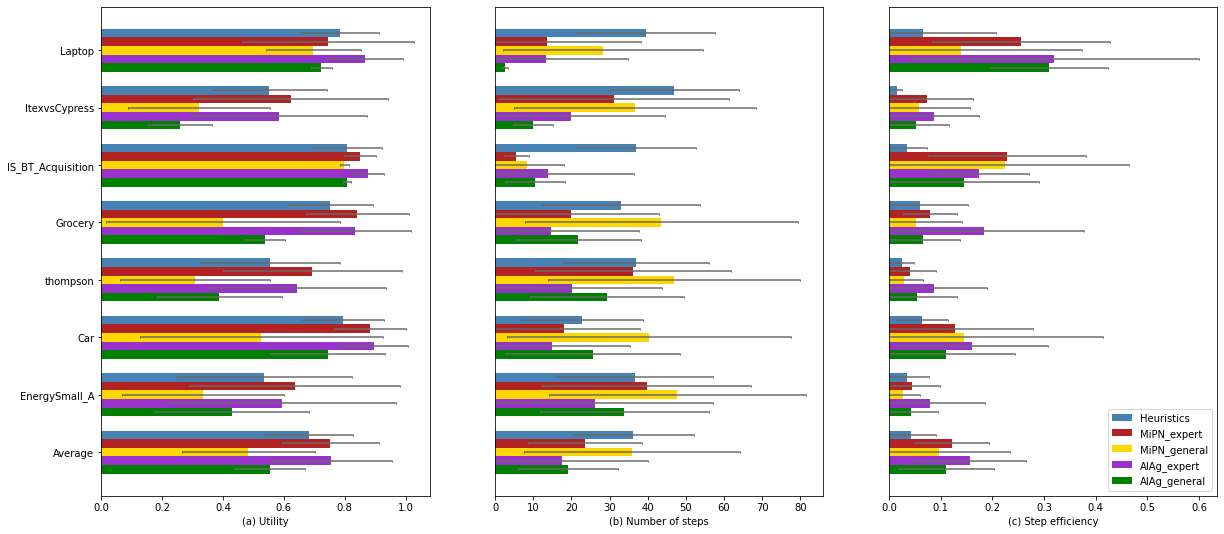

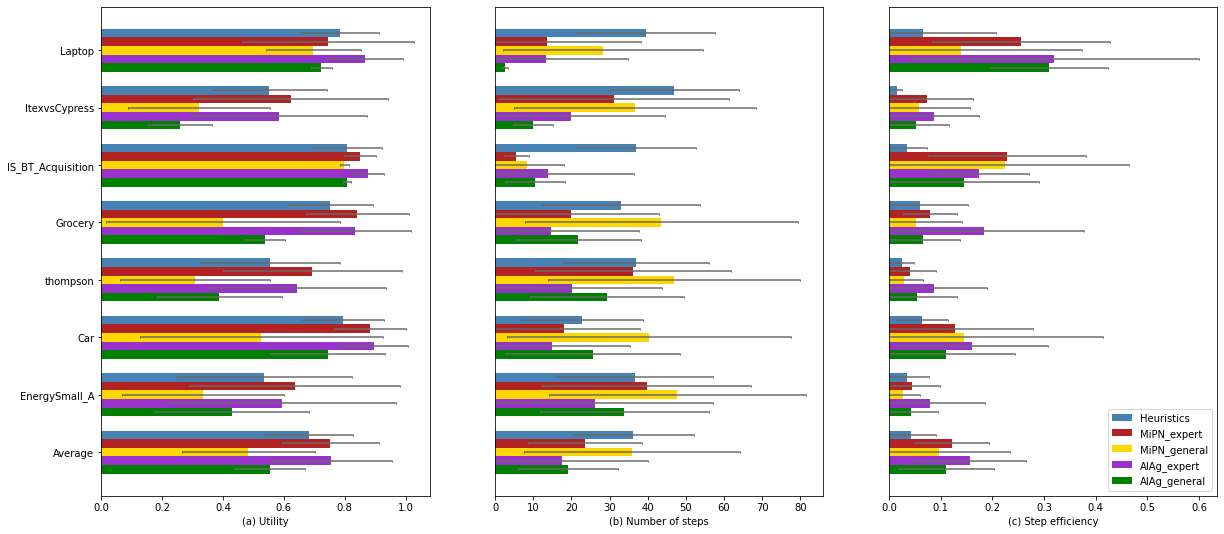

In [28]:
import matplotlib.pyplot as plt
ISSUE_NAMES = [
    'Laptop',
    'ItexvsCypress',
    'IS_BT_Acquisition',
    'Grocery',
    'thompson',
    'Car',
    'EnergySmall_A'
]
xlabels = ISSUE_NAMES
xlabels.append("Average")
print(xlabels)
fig, ax = plt.subplots(1,3,figsize=(20,9))
x = np.arange(len(xlabels))[::-1]
print(x)
height = 0.15

# Utility Plot
aiag_util = results_all.loc["Average"]
aiag_util_std = results_all.iloc[:-1].std(axis=0)

aiag_expert_util = results_expert.loc["Average"]
aiag_expert_util_std = results_expert.iloc[:-1].std(axis=0)

mipn_util = results_mipn_expert.loc["Average"]
mipn_util_std = results_mipn_expert.iloc[:-1].std(axis=0)

mipn_general_util = results_mipn_all.loc["Average"]
mipn_general_util_std = results_mipn_all.iloc[:-1].std(axis=0)

heuristics_util = results_heuristics.loc["Average"]
heuristics_util_std = results_heuristics.iloc[:-1].std(axis=0)

ax[0].barh(x+height*2, heuristics_util, height=height, color="steelblue", xerr=heuristics_util_std, ecolor="dimgray", capsize=1, label='Heuristics', align='center')
ax[0].barh(x+height, mipn_util, height=height, color="firebrick", xerr=mipn_util_std, ecolor="dimgray", capsize=1, label='MiPN_expert', align='center')
ax[0].barh(x, mipn_general_util, height=height, color="gold", xerr=mipn_general_util_std, ecolor="dimgray", capsize=1, label='MiPN_general', align='center')
ax[0].barh(x-height, aiag_expert_util, height=height, color="darkorchid", xerr=aiag_expert_util_std, ecolor="dimgray", capsize=1, label='AIAg_expert', align='center')
ax[0].barh(x-height*2, aiag_util, height=height, color="green", xerr=aiag_util_std, ecolor="dimgray", capsize=1, label='AIAg_general', align='center')
ax[0].set_yticks(x)
ax[0].set_yticklabels(xlabels)
ax[0].set_xlim(0)
ax[0].set_xlabel("(a) Utility")

# Number of Steps Plot
aiag_step = results_all_step.loc["Average"]
aiag_step_std = results_all_step.iloc[:-1].std(axis=0)

aiag_expert_step = results_expert_step.loc["Average"]
aiag_expert_step_std = results_expert_step.iloc[:-1].std(axis=0)

mipn_step = results_mipn_expert_step.loc["Average"]
mipn_step_std = results_mipn_expert_step.iloc[:-1].std(axis=0)

mipn_general_step = results_mipn_all_step.loc["Average"]
mipn_general_step_std = results_mipn_all_step.iloc[:-1].std(axis=0)

heuristics_util_step = results_heuristics_step.loc["Average"]
heuristics_step_std = results_heuristics_step.iloc[:-1].std(axis=0)

ax[1].barh(x+height*2, heuristics_util_step, height=height, color="steelblue", xerr=heuristics_step_std, ecolor="dimgray", capsize=1, label='Heuristics', align='center')
ax[1].barh(x+height, mipn_step, height=height, color="firebrick", xerr=mipn_step_std, ecolor="dimgray", capsize=1, label='MiPN_expert', align='center')
ax[1].barh(x, mipn_general_step, height=height, color="gold", xerr=mipn_general_step_std, ecolor="dimgray", capsize=1, label='MiPN_general', align='center')
ax[1].barh(x-height, aiag_expert_step, height=height, color="darkorchid", xerr=aiag_expert_step_std, ecolor="dimgray", capsize=1, label='AIAg_expert', align='center')
ax[1].barh(x-height*2, aiag_step, height=height, color="green", xerr=aiag_step_std, ecolor="dimgray", capsize=1, label='AIAg_general', align='center')
ax[1].set_yticks([])
# ax[2].set_yticklabels(xlabels)
ax[1].set_xlim(0)
ax[1].set_xlabel("(b) Number of steps")
# ax[2].legend(loc="best")

# Step Efficiency Plot
aiag_step_eff = results_all_step_eff.loc["Average"]
aiag_step_std_eff = results_all_step_eff.iloc[:-1].std(axis=0)

aiag_expert_step_eff = results_expert_step_eff.loc["Average"]
aiag_expert_step_std_eff = results_expert_step_eff.iloc[:-1].std(axis=0)

mipn_step_eff = results_mipn_expert_step_eff.loc["Average"]
mipn_step_std_eff = results_mipn_expert_step_eff.iloc[:-1].std(axis=0)

mipn_general_step_eff = results_mipn_all_step_eff.loc["Average"]
mipn_general_step_std_eff = results_mipn_all_step_eff.iloc[:-1].std(axis=0)

heuristics_util_step_eff = results_heuristics_step_eff.loc["Average"]
heuristics_step_std_eff = results_heuristics_step_eff.iloc[:-1].std(axis=0)

ax[2].barh(x+height*2, heuristics_util_step_eff, height=height, color="steelblue", xerr=heuristics_step_std_eff, ecolor="dimgray", capsize=1, label='Heuristics', align='center')
ax[2].barh(x+height, mipn_step_eff, height=height, color="firebrick", xerr=mipn_step_std_eff, ecolor="dimgray", capsize=1, label='MiPN_expert', align='center')
ax[2].barh(x, mipn_general_step_eff, height=height, color="gold", xerr=mipn_general_step_std_eff, ecolor="dimgray", capsize=1, label='MiPN_general', align='center')
ax[2].barh(x-height, aiag_expert_step_eff, height=height, color="darkorchid", xerr=aiag_expert_step_std_eff, ecolor="dimgray", capsize=1, label='AIAg_expert', align='center')
ax[2].barh(x-height*2, aiag_step_eff, height=height, color="green", xerr=aiag_step_std_eff, ecolor="dimgray", capsize=1, label='AIAg_general', align='center')
ax[2].set_yticks([])
# ax[3].set_yticklabels(xlabels)
ax[2].set_xlabel("(c) Step efficiency")
ax[2].set_xlim(0)
ax[2].legend(loc="best")

fig